In [1]:
import sys
import numpy as np
import time
import matplotlib.pyplot as plt
sys.path.append(r'C:\Chuji\Code_and_Data\MyCode')

import Circuit_Simulator 
import PulseGenerator as PG
from toolfunc import *
from toolfunc import adia_analysis

## large detuning, BAQ 

In [13]:
raw_config = Circuit_Simulator.RawConfig(qubit_num=3,dimension=3,circuit_type=1,initial_state='ground',sampling_rate=1e9)
raw_config.load_default_value(modulation=True,decoherence=False,use_capacitance=False)

flux_pulse = np.linspace(1,0/9,600)
# flux_pulse = np.linspace(8/9,0/9,6000)
freq_array = 9e9 -flux_pulse * (9e9 - 1e9)

raw_config.setValue('Q1 f01_max',6.00e9)
raw_config.setValue('Q2 f01_max',9e9)
raw_config.setValue('Q3 f01_max',5.4e9)
raw_config.setValue('Q1 f01_min',1e9)
raw_config.setValue('Q2 f01_min',1e9)
raw_config.setValue('Q3 f01_min',1e9)
raw_config.setValue('Q1 Ec',0.25e9)
raw_config.setValue('Q2 Ec',0.3e9)
raw_config.setValue('Q3 Ec',0.25e9)

raw_config.setValue('r12',0.018)
raw_config.setValue('r23',0.018)
raw_config.setValue('r13',-0.0008)

raw_config.setValue('Q2 Voltage period',-1)
raw_config.setValue('Q2 Voltage operating point',0)
raw_config.setValue('Q2 Flux',flux_pulse)

# raw_config.setValue('Uniform XY LO',True)
# raw_config.setValue('XY LO Freq',5.94e9)

simu_config = Circuit_Simulator.read_config(raw_config.get_dict())
Simulator = Circuit_Simulator.Simulator(simu_config)
Simulator.show_pulse()

{'Q1_freq': '6000.0MHz', 'Q1_anhar': '-125.0MHz', 'Q2_freq': '1000.0MHz', 'Q2_anhar': '-150.0MHz', 'Q3_freq': '5400.0MHz', 'Q3_anhar': '-125.0MHz', 'g12': '44.0908MHz', 'g13': '-4.5537MHz', 'g23': '41.8282MHz'}


In [14]:
Simulator.performsimulation(solver_type=2,resample_factor=1,eigen_cloest_to_bare=False,sort_by_maximum_overlap=True,gap=20e6)

In [15]:
Simulator.EigenResult.show_eigenenergy()

In [8]:
%matplotlib qt

In [16]:
eigen_trace = Simulator.EigenResult.get_Ener_gap_trace('101-100-001+000')
fig = plt.figure(figsize=[6.4,6])
ax = fig.add_subplot(111)
# ZZ_from_top_00024 = eigen_trace
# ZZ_from_top_00012 = eigen_trace
ZZ_from_top_00018 = eigen_trace
ax.plot(freq_array/1e9,eigen_trace/1e6)

In [19]:
%matplotlib qt

In [42]:
Eigen101=Simulator.EigenResult.eigen_ener[:,10]/1e9
Eigen011=Simulator.EigenResult.eigen_ener[:,4]/1e9
Eigen110=Simulator.EigenResult.eigen_ener[:,12]/1e9
Eigen200=Simulator.EigenResult.eigen_ener[:,18]/1e9
Eigen020=Simulator.EigenResult.eigen_ener[:,6]/1e9
Eigen002=Simulator.EigenResult.eigen_ener[:,2]/1e9
Eigen001=Simulator.EigenResult.eigen_ener[:,1]/1e9
Eigen010=Simulator.EigenResult.eigen_ener[:,3]/1e9
Eigen100=Simulator.EigenResult.eigen_ener[:,9]/1e9

(3.6, 13.6)

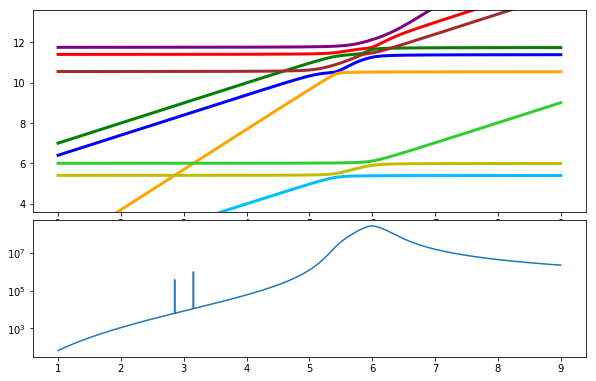

In [45]:
fig=plt.figure(figsize=[9.6,5.6])
# ax = fig.add_subplot(111)
ax = fig.add_axes([0.1,0.46,0.8,0.5])
ax2 = fig.add_axes([0.1,0.1,0.8,0.34])

lw=3
ax.plot(freq_array/1e9,Eigen011,label='011',linewidth=lw,c='blue')
ax.plot(freq_array/1e9,Eigen101,label='101',linewidth=lw,c='red')
ax.plot(freq_array/1e9,Eigen110,label='110',linewidth=lw,c='green')
ax.plot(freq_array/1e9,Eigen002,label='002',linewidth=lw,c='brown')
ax.plot(freq_array/1e9,Eigen020,label='020',linewidth=lw,c='orange')
ax.plot(freq_array/1e9,Eigen200,label='200',linewidth=lw,c='purple')
ax.plot(freq_array/1e9,Eigen001,label='001',linewidth=lw,c='y')
ax.plot(freq_array/1e9,Eigen010,label='010',linewidth=lw,c='deepskyblue')
ax.plot(freq_array/1e9,Eigen100,label='100',linewidth=lw,c='limegreen')

ax2.plot(freq_array/1e9,np.abs(ZZ_from_top_00018),'-')
# ax2.plot(freq_array/1e9,-1*ZZ_from_top_00012)
# ax2.plot(freq_array/1e9,-1*ZZ_from_top_00000)

ax2.set_yscale('log')
ax.set_ylim([3.6,13.6])

In [125]:
# np.linspace(0,0.0025,26)

array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
       0.0008, 0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015,
       0.0016, 0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023,
       0.0024, 0.0025])

In [44]:
%matplotlib inline

In [124]:
9e9 -3.6/9 * (9e9 - 1e9)

5800000000.0

In [46]:
ZZ_TRACE=[]
r_arr = np.linspace(-0.0015,0.0015,31)
for r13 in r_arr:
    raw_config = Circuit_Simulator.RawConfig(qubit_num=3,dimension=3,circuit_type=1,initial_state='ground',sampling_rate=1e9)
    raw_config.load_default_value(modulation=True,decoherence=False,use_capacitance=False)

    flux_pulse = np.linspace(1,0.4,1000)
    freq_array = 9e9 -flux_pulse * (9e9 - 1e9)

    raw_config.setValue('Q1 f01_max',6.00e9)
    raw_config.setValue('Q2 f01_max',9e9)
    raw_config.setValue('Q3 f01_max',5.4e9)
    raw_config.setValue('Q1 f01_min',1e9)
    raw_config.setValue('Q2 f01_min',1e9)
    raw_config.setValue('Q3 f01_min',1e9)
    raw_config.setValue('Q1 Ec',0.25e9)
    raw_config.setValue('Q2 Ec',0.3e9)
    raw_config.setValue('Q3 Ec',0.25e9)

    raw_config.setValue('r12',0.018)
    raw_config.setValue('r23',0.018)
    raw_config.setValue('r13',r13)

    raw_config.setValue('Q2 Voltage period',-1)
    raw_config.setValue('Q2 Voltage operating point',0.00)
    raw_config.setValue('Q2 Flux',flux_pulse)

    simu_config = Circuit_Simulator.read_config(raw_config.get_dict())
    Simulator = Circuit_Simulator.Simulator(simu_config)
    Simulator.performsimulation(solver_type=2,resample_factor=1,eigen_cloest_to_bare=False,sort_by_maximum_overlap=True,gap=10e6)
    eigen_trace = Simulator.EigenResult.get_Ener_gap_trace('101-100-001+000')
    print(r13)
    ZZ_TRACE.append(eigen_trace)

-0.0015
-0.0014
-0.0013
-0.0012000000000000001
-0.0011
-0.001
-0.0009
-0.0008
-0.0007
-0.0006
-0.0005
-0.00039999999999999996
-0.0002999999999999999
-0.00019999999999999987
-0.00010000000000000005
0.0
0.00010000000000000005
0.0002000000000000001
0.00030000000000000014
0.00039999999999999996
0.0005
0.0006000000000000003
0.0007000000000000001
0.0007999999999999999
0.0009000000000000002
0.001
0.0011000000000000003
0.0012000000000000001
0.0013
0.0014000000000000002
0.0015


In [53]:
# freq_array

In [17]:
from matplotlib import cm
from matplotlib import *

fig = plt.figure(figsize=[8,7.2])
ax = fig.add_axes([0.1,0.1,0.78,0.76])
ax_colorbar = fig.add_axes([0.9,0.1,0.02,0.76])
X,Y = np.meshgrid(freq_array/1e9,r_arr*1000)
im = ax.pcolor(X,Y,np.abs(ZZ_TRACE)/1e6,cmap=cm.coolwarm,norm=colors.LogNorm(),vmin=5e-5,vmax=80)
colarbar= plt.colorbar(im,cax=ax_colorbar)


ax.plot(freq_array[0:900]/1e9,r12_zero_geff(6e9,5.4e9,freq_array[0:900],0.018,0.018)*1000,'k')

ax.set_ylim([-1.5,1.5])
ax.tick_params(labelsize=16)
ax_colorbar.tick_params(labelsize=16)

NameError: name 'r_arr' is not defined

In [55]:
def r12_zero_geff(w1,w2,wc,r1c,r2c):
    g1cg2c = np.sqrt(w1*wc)*r1c*np.sqrt(w2*wc)*r2c
    g12 = -g1cg2c*(1/(w1-wc)+1/(w2-wc)-1/(w1+wc)-1/(w2+wc))/2
    return g12/(np.sqrt(w1*w2))

In [61]:
%matplotlib qt